In [1]:
import pandas as pd
import numpy as np

import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import(
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Linear Regression

<b>Data Preparation</b>

In [2]:
df = pd.read_csv('MobilePhonedata_new2.csv')
df = df.iloc[: , 1:]
X=df.drop("Price", axis=1)
y=np.log(df["Price"])
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.45,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.71,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.50,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.71,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.71,1,0,0,0,5000


In [3]:
X = pd.get_dummies(X, columns=["Brand", "Model", "OS"], drop_first=True)
X.head()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Brand_Asus,Brand_BlackBerry,Brand_Google,...,Model_iPhone XR,Model_iPhone XS,Model_iPhone XS Max,Model_style,Model_style 2,Model_style2,OS_BlackBerry OS,OS_Other,OS_Symbian OS,OS_iOS
0,16.0,2.0,5.45,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.0,2.0,5.71,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.0,0.5,3.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16.0,2.0,5.71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,2.0,5.71,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.1, random_state=42
)

<b>Choose Model, Train and Evaluate</b>

In [12]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [13]:
#Coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficients for {} is {}".format(col_name, linearregression.coef_[0][idx])
    )

IndexError: invalid index to scalar variable.

In [14]:
print("The intercept for our model is {}".format(linearregression.intercept_[0]))

IndexError: invalid index to scalar variable.

In [15]:
pred_train = linearregression.predict(X_train)
pred_test = linearregression.predict(X_test)

In [16]:
#R2 Squared
lrscore_train = linearregression.score(X_train, y_train)
lrscore_test = linearregression.score(X_test, y_test)
print(lrscore_train)
print(lrscore_test)

0.9453991907376229
-199870930315925.38


In [17]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse_lr_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_lr_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_lr_train)
print(rmse_lr_test)

0.18675248915675133
11419290.601834722


In [18]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

NameError: name 'data' is not defined

<Figure size 720x504 with 0 Axes>

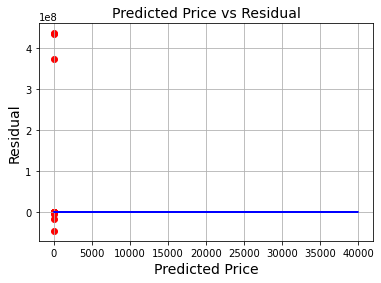

In [19]:
plt.scatter(y_test, pred_test, color="red")
plt.plot( y_test, color="blue")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

<b>Comparing the actual output values for X_test with the predicted values.</b>

In [20]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

KeyError: 'Price'

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

KeyError: 'residual'

<Figure size 720x504 with 0 Axes>

9766       637.84375
22672      128.18750
2300      1440.50000
15956   -18832.43750
27170     6377.21875
            ...     
11469      462.15625
6713      3887.34375
39206     5554.90625
14223     1987.00000
3475     -5347.34375
Name: residual, Length: 12007, dtype: float64


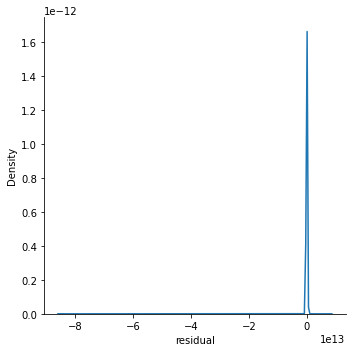

In [51]:
print(data.residual)
import seaborn as sns
d = pd.DataFrame(data.residual)

sns.displot(data=d, x = "residual",kind="kde")

Because of the complexity in the data, Linear Regression is not a good choice for this scenario.

### Random Forest Regressor 

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfregressor =RandomForestRegressor(max_depth=80, min_samples_split=10,criterion="squared_error")
rfregressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=80, min_samples_split=10)

In [18]:
y_train

,Price
37368,147000
6280,17500
5953,17000
40017,480000
24554,42000
...,...
6265,17500
11284,24000
38158,177000
860,7800


In [53]:
pred_train = rfregressor.predict(X_train)
pred_test = rfregressor.predict(X_test)

NameError: name 'rfregressor' is not defined

In [20]:
rfscore_train = rfregressor.score(X_train, y_train)
rfscore_test = rfregressor.score(X_test, y_test)
print(rfscore_train)
print(rfscore_test)

0.9752085698350669
0.9605708146775603


The R-squared values are around 94% and 93% which is very high compared to Linear Regression. 

In [21]:
rmse_rf_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_rf_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_rf_train)
print(rmse_rf_test)

8219.138668319478
10320.391159606683


In [22]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22325.936244,-325.936244
22672,39000,39500.159657,-500.159657
2300,11000,9980.575483,1019.424517
15956,29500,46009.483211,-16509.483211
27170,49000,49435.690277,-435.690277


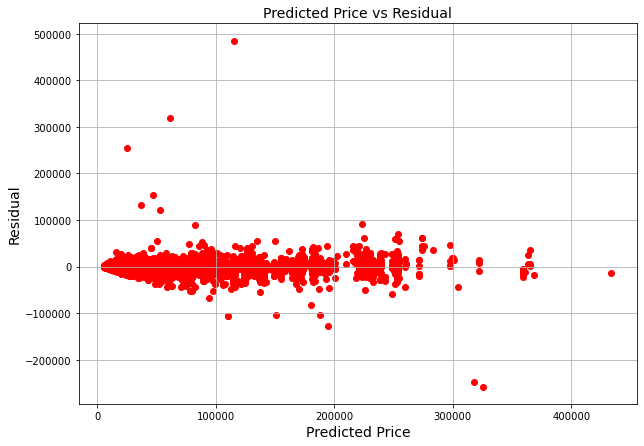

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [24]:
pd.DataFrame(rfregressor.feature_importances_, index=X_test.columns).sort_values(
    0, ascending=False
)

,0
RAM,0.355145
ROM,0.320751
OS_iOS,0.093523
Model_iPhone 12 Pro Max,0.075398
Screen size,0.034195
...,...
Model_Redmi Note 3,0.000000
Model_Nova 2 Lite,0.000000
Model_Safari,0.000000
Model_Safari 2,0.000000


### Adaboost Regressor

In [25]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
adaboost = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(
        max_depth=10, min_samples_split=100, random_state=42
    ),
    random_state=42,
)
adaboost.fit(X_train, y_train.values.ravel())

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       min_samples_split=100,
                                                       random_state=42),
                  random_state=42)

In [26]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

In [27]:
adascore_train = adaboost.score(X_train, y_train)
adascore_test = adaboost.score(X_test, y_test)
print(adascore_train)
print(adascore_test)

0.9506333594260149
0.9375204646263878


In [28]:
#RMSE
rmse_ada_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_ada_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_ada_train)
print(rmse_ada_test)

11598.245688635523
12991.405894271455


In [29]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22735.733945,-735.733945
22672,39000,39370.818182,-370.818182
2300,11000,10692.612245,307.387755
15956,29500,34534.449608,-5034.449608
27170,49000,44833.763566,4166.236434


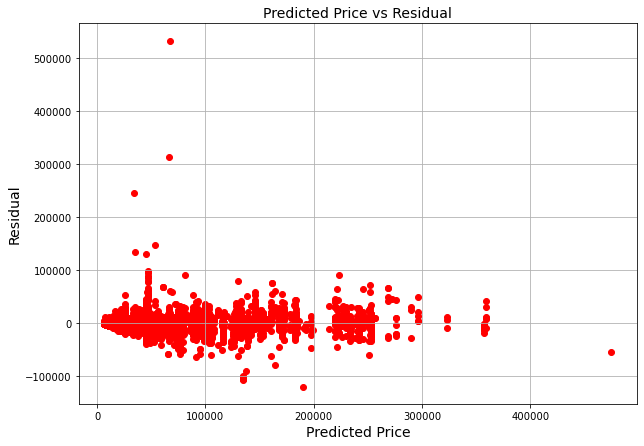

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### Gradient Boost Regressor 

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gradientboost = GradientBoostingRegressor(
    max_depth=10, min_samples_split=100, learning_rate=0.01, random_state=30
)
gradientboost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=100, random_state=30)

In [65]:
pred_train = gradientboost.predict(X_train)
pred_test = gradientboost.predict(X_test)

In [66]:
#RMSE
rmse_gradient_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_gradient_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_gradient_train)
print(rmse_gradient_test)

21788.241280245515
22151.94969718857


In [34]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,33339.427366,-11339.427366
22672,39000,44313.693948,-5313.693948
2300,11000,25564.371392,-14564.371392
15956,29500,44345.351416,-14845.351416
27170,49000,47406.074275,1593.925725


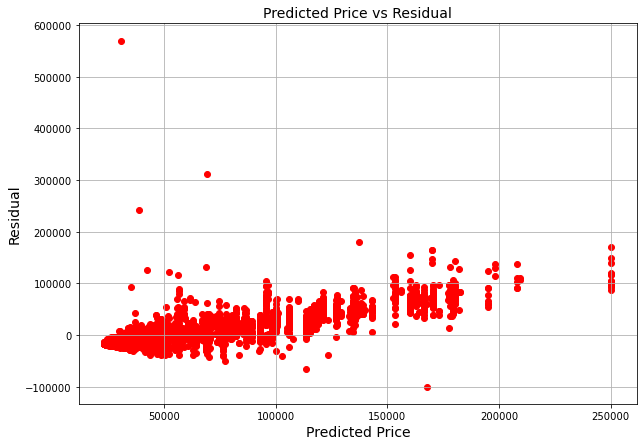

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### MLP Regressor

In [36]:
from sklearn.neural_network import MLPRegressor
mlpregressor = MLPRegressor(
    hidden_layer_sizes=8,
    activation="relu",
    solver="adam",
    verbose=True,
    n_iter_no_change=1000,
    max_iter=2000,
    tol=0.001,
    random_state=42,
)
mlpregressor.fit(X_train, y_train.values.ravel())

Iteration 1, loss = 2749467231.66211987
Iteration 2, loss = 2744657295.46700430
Iteration 3, loss = 2734354440.27566957
Iteration 4, loss = 2720411918.80964947
Iteration 5, loss = 2702725320.95245695
Iteration 6, loss = 2681605134.53726339
Iteration 7, loss = 2657195864.29869699
Iteration 8, loss = 2629657013.48597717
Iteration 9, loss = 2599318789.10924816
Iteration 10, loss = 2566365797.23986149
Iteration 11, loss = 2531299844.29710960
Iteration 12, loss = 2494088583.58781910
Iteration 13, loss = 2454963489.27360106
Iteration 14, loss = 2414229477.18143892
Iteration 15, loss = 2371922416.95725536
Iteration 16, loss = 2328216781.14284992
Iteration 17, loss = 2283346628.39066362
Iteration 18, loss = 2237508730.41149330
Iteration 19, loss = 2190785312.62856960
Iteration 20, loss = 2143471578.20528650
Iteration 21, loss = 2095657385.51934719
Iteration 22, loss = 2047434510.36943150
Iteration 23, loss = 1999008900.05104828
Iteration 24, loss = 1950450491.44357991
Iteration 25, loss = 1902

Iteration 203, loss = 800751677.39184952
Iteration 204, loss = 800201366.59876013
Iteration 205, loss = 799680177.63827300
Iteration 206, loss = 799145085.58642471
Iteration 207, loss = 798608493.18847597
Iteration 208, loss = 798080078.55243170
Iteration 209, loss = 797555510.71966028
Iteration 210, loss = 797015435.69442201
Iteration 211, loss = 796463629.79718566
Iteration 212, loss = 795938016.15630925
Iteration 213, loss = 795408552.72230172
Iteration 214, loss = 794880177.06257284
Iteration 215, loss = 794352465.15181875
Iteration 216, loss = 793856289.29270494
Iteration 217, loss = 793284725.75761020
Iteration 218, loss = 792757399.51982486
Iteration 219, loss = 792220397.11379647
Iteration 220, loss = 791693527.19663680
Iteration 221, loss = 791160982.38018894
Iteration 222, loss = 790629903.39405334
Iteration 223, loss = 790066956.92685068
Iteration 224, loss = 789542271.14253128
Iteration 225, loss = 788982898.38703406
Iteration 226, loss = 788451202.15210390
Iteration 227, l

Iteration 403, loss = 661596842.08166277
Iteration 404, loss = 660660700.21654153
Iteration 405, loss = 659725794.59909213
Iteration 406, loss = 658789086.91463888
Iteration 407, loss = 657859492.91035748
Iteration 408, loss = 656921834.43652344
Iteration 409, loss = 655990790.79862535
Iteration 410, loss = 655071034.13675010
Iteration 411, loss = 654111105.47958994
Iteration 412, loss = 653162927.73335421
Iteration 413, loss = 652242708.11842525
Iteration 414, loss = 651291792.08331251
Iteration 415, loss = 650359879.02607751
Iteration 416, loss = 649417801.62491965
Iteration 417, loss = 648447815.01327753
Iteration 418, loss = 647509203.16642475
Iteration 419, loss = 646536891.40833104
Iteration 420, loss = 645592486.95112669
Iteration 421, loss = 644612459.81293893
Iteration 422, loss = 643685636.58256376
Iteration 423, loss = 642718940.78807640
Iteration 424, loss = 641732137.35581756
Iteration 425, loss = 640773113.29809046
Iteration 426, loss = 639800297.81188178
Iteration 427, l

Iteration 603, loss = 469959112.93413132
Iteration 604, loss = 469055782.62710238
Iteration 605, loss = 468205570.76024890
Iteration 606, loss = 467349103.24167615
Iteration 607, loss = 466506121.40951252
Iteration 608, loss = 465632267.08590835
Iteration 609, loss = 464772399.21043468
Iteration 610, loss = 463952266.64225930
Iteration 611, loss = 463130756.28432691
Iteration 612, loss = 462236286.78119385
Iteration 613, loss = 461431434.28341562
Iteration 614, loss = 460593264.02619499
Iteration 615, loss = 459731071.63014150
Iteration 616, loss = 458921322.73137474
Iteration 617, loss = 458050968.48349679
Iteration 618, loss = 457203013.88715458
Iteration 619, loss = 456383268.52280766
Iteration 620, loss = 455573611.39383507
Iteration 621, loss = 454725726.67742479
Iteration 622, loss = 453881737.69871962
Iteration 623, loss = 453062943.18926185
Iteration 624, loss = 452242785.59381300
Iteration 625, loss = 451417803.48461914
Iteration 626, loss = 450580122.97314423
Iteration 627, l

Iteration 803, loss = 318987214.87603295
Iteration 804, loss = 318209570.78884667
Iteration 805, loss = 317449815.89186335
Iteration 806, loss = 316652674.48017871
Iteration 807, loss = 315873393.19861186
Iteration 808, loss = 315062494.18211675
Iteration 809, loss = 314263160.75792259
Iteration 810, loss = 313418830.12045705
Iteration 811, loss = 312643884.49092215
Iteration 812, loss = 311791793.31265056
Iteration 813, loss = 310982037.16400421
Iteration 814, loss = 310172604.26903909
Iteration 815, loss = 309352019.28934920
Iteration 816, loss = 308522053.93439436
Iteration 817, loss = 307620187.91466951
Iteration 818, loss = 306729485.82355624
Iteration 819, loss = 305851811.24127358
Iteration 820, loss = 305051803.27636045
Iteration 821, loss = 304218097.85065639
Iteration 822, loss = 303471384.93979234
Iteration 823, loss = 302647439.71018261
Iteration 824, loss = 301926989.44014859
Iteration 825, loss = 301137536.44866312
Iteration 826, loss = 300393475.80119723
Iteration 827, l

Iteration 1003, loss = 191872914.93679878
Iteration 1004, loss = 191404153.68748623
Iteration 1005, loss = 190945710.31267181
Iteration 1006, loss = 190470130.50270125
Iteration 1007, loss = 190023722.69691566
Iteration 1008, loss = 189544298.45894742
Iteration 1009, loss = 189082566.74603686
Iteration 1010, loss = 188634113.81878209
Iteration 1011, loss = 188168448.54077455
Iteration 1012, loss = 187716742.85046342
Iteration 1013, loss = 187270072.85626492
Iteration 1014, loss = 186827278.54421285
Iteration 1015, loss = 186394273.33930942
Iteration 1016, loss = 185957010.29081815
Iteration 1017, loss = 185540096.42258865
Iteration 1018, loss = 185066372.96751800
Iteration 1019, loss = 184604548.60775384
Iteration 1020, loss = 184212302.91861039
Iteration 1021, loss = 183731659.57711136
Iteration 1022, loss = 183311656.08153248
Iteration 1023, loss = 182869064.42591915
Iteration 1024, loss = 182410965.83231610
Iteration 1025, loss = 182028284.02028409
Iteration 1026, loss = 181542638.9

Iteration 1199, loss = 127904706.07621758
Iteration 1200, loss = 127700361.14129391
Iteration 1201, loss = 127474879.79046047
Iteration 1202, loss = 127299809.79695299
Iteration 1203, loss = 127050713.30309230
Iteration 1204, loss = 126844325.61300519
Iteration 1205, loss = 126641483.39332749
Iteration 1206, loss = 126428355.25877272
Iteration 1207, loss = 126230664.86944871
Iteration 1208, loss = 126014061.98095477
Iteration 1209, loss = 125826739.86469464
Iteration 1210, loss = 125626571.51576674
Iteration 1211, loss = 125419916.36901815
Iteration 1212, loss = 125213759.77749564
Iteration 1213, loss = 125040511.97609454
Iteration 1214, loss = 124813045.77627216
Iteration 1215, loss = 124624689.83334133
Iteration 1216, loss = 124434094.41394024
Iteration 1217, loss = 124229174.54766709
Iteration 1218, loss = 124033875.84699987
Iteration 1219, loss = 123863484.81745245
Iteration 1220, loss = 123697161.15148814
Iteration 1221, loss = 123452672.43170804
Iteration 1222, loss = 123271883.0

Iteration 1395, loss = 99987288.57115705
Iteration 1396, loss = 99916897.39251770
Iteration 1397, loss = 99810291.53506614
Iteration 1398, loss = 99769168.97328281
Iteration 1399, loss = 99653796.01416932
Iteration 1400, loss = 99585281.67502755
Iteration 1401, loss = 99523721.12194479
Iteration 1402, loss = 99404539.34479970
Iteration 1403, loss = 99356005.62864999
Iteration 1404, loss = 99236728.81497073
Iteration 1405, loss = 99144233.43051544
Iteration 1406, loss = 99062323.65456972
Iteration 1407, loss = 98980112.72840685
Iteration 1408, loss = 98905577.13240780
Iteration 1409, loss = 98819060.78307156
Iteration 1410, loss = 98737242.67524129
Iteration 1411, loss = 98652601.43144865
Iteration 1412, loss = 98579569.12986307
Iteration 1413, loss = 98510365.78066386
Iteration 1414, loss = 98416320.93644014
Iteration 1415, loss = 98339466.90524323
Iteration 1416, loss = 98251457.13493507
Iteration 1417, loss = 98184104.28851451
Iteration 1418, loss = 98043132.40798569
Iteration 1419, 

Iteration 1595, loss = 88104732.98575030
Iteration 1596, loss = 88046940.10538869
Iteration 1597, loss = 88021336.14366098
Iteration 1598, loss = 87947169.34909520
Iteration 1599, loss = 87938190.17996939
Iteration 1600, loss = 87912718.56222391
Iteration 1601, loss = 87835574.16390775
Iteration 1602, loss = 87808899.83207944
Iteration 1603, loss = 87767575.43828264
Iteration 1604, loss = 87729312.51249136
Iteration 1605, loss = 87670108.37771210
Iteration 1606, loss = 87636721.99160349
Iteration 1607, loss = 87604166.41862504
Iteration 1608, loss = 87565788.93129833
Iteration 1609, loss = 87502069.61641134
Iteration 1610, loss = 87465472.48956975
Iteration 1611, loss = 87429923.84511209
Iteration 1612, loss = 87391216.49044870
Iteration 1613, loss = 87348860.63831303
Iteration 1614, loss = 87297183.85842514
Iteration 1615, loss = 87276500.86246477
Iteration 1616, loss = 87238304.47232525
Iteration 1617, loss = 87215840.77776782
Iteration 1618, loss = 87159176.12512153
Iteration 1619, 

Iteration 1795, loss = 81284545.77594233
Iteration 1796, loss = 81273947.34589295
Iteration 1797, loss = 81237862.10209580
Iteration 1798, loss = 81209530.43704662
Iteration 1799, loss = 81177491.51421930
Iteration 1800, loss = 81142625.73204167
Iteration 1801, loss = 81102533.47622246
Iteration 1802, loss = 81090840.23225637
Iteration 1803, loss = 81074368.11011858
Iteration 1804, loss = 81020893.41505064
Iteration 1805, loss = 81003447.58481646
Iteration 1806, loss = 80955834.76304251
Iteration 1807, loss = 80962785.47621314
Iteration 1808, loss = 80930276.92389059
Iteration 1809, loss = 80891397.75288779
Iteration 1810, loss = 80873354.98331511
Iteration 1811, loss = 80851085.75973044
Iteration 1812, loss = 80811353.89307842
Iteration 1813, loss = 80798449.31104124
Iteration 1814, loss = 80765225.28149568
Iteration 1815, loss = 80718133.78213869
Iteration 1816, loss = 80705841.54967967
Iteration 1817, loss = 80670293.69116184
Iteration 1818, loss = 80646396.54809949
Iteration 1819, 

Iteration 1995, loss = 76239533.30125427
Iteration 1996, loss = 76218397.54604635
Iteration 1997, loss = 76201663.14556535
Iteration 1998, loss = 76160799.66130686
Iteration 1999, loss = 76143789.52817802
Iteration 2000, loss = 76135198.60352844


MLPRegressor(hidden_layer_sizes=8, max_iter=2000, n_iter_no_change=1000,
             random_state=42, tol=0.001, verbose=True)

In [37]:
pred_train = mlpregressor.predict(X_train)
pred_test = mlpregressor.predict(X_test)

In [38]:
mlpscore_train = mlpregressor.score(X_train, y_train)
mlpscore_test = mlpregressor.score(X_train, y_train)
print(mlpscore_train)
print(mlpscore_test)

0.9441503238523707
0.9441503238523707


In [39]:
#RMSE
rmse_mlp_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_mlp_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_mlp_train)
print(rmse_mlp_test)

12336.326261066291
12055.471833142914


In [40]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22025.303934,-25.303934
22672,39000,39302.751011,-302.751011
2300,11000,16339.916261,-5339.916261
15956,29500,48821.231786,-19321.231786
27170,49000,43597.967632,5402.032368


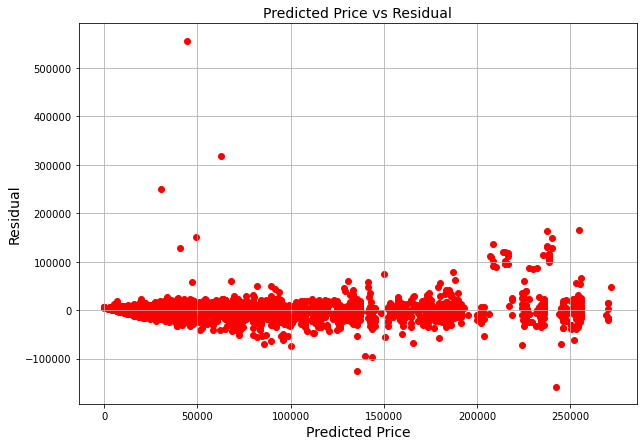

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### XGB Regressor

In [42]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(
    max_depth=10, learning_rate=0.1, reg_alpha=1, random_state=42
)
xgbregressor.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
pred_train = xgbregressor.predict(X_train)
pred_test = xgbregressor.predict(X_test)

In [44]:
xgbscore_train = xgbregressor.score(X_train, y_train)
xgbscore_test = xgbregressor.score(X_test, y_test)
print(xgbscore_train)
print(xgbscore_test)

0.9771665893798432
0.9506573144660839


In [45]:
#RMSE
rmse_xgb_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_xgb_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_xgb_train)
print(rmse_xgb_test)

7887.8911804078025
11545.125215630496


In [46]:
data = y_test.copy()
data["pred"] = pred_test
data["residual"] = data["Price"] - data["pred"]
data.head()

,Price,pred,residual
9766,22000,22465.250000,-465.250000
22672,39000,39461.273438,-461.273438
2300,11000,10187.328125,812.671875
15956,29500,43730.449219,-14230.449219
27170,49000,45002.765625,3997.234375


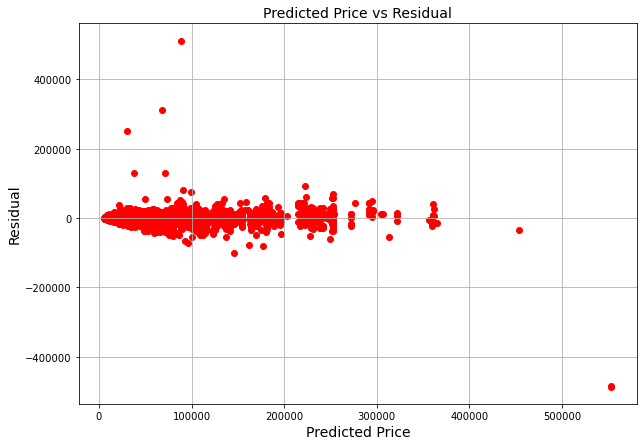

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

### Stacking Model

<p>Stacking model will be built using the tuned models- decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.</p>

In [48]:
estimators = [
    ("Gradient Boost", gradientboost),
    ("MLP", mlpregressor),
    ("Ada Boost", adaboost),
    ("Random Forest", rfregressor),
]
final_estimator = XGBRegressor(
    max_depth = 10, learning_rate=0.1, reg_alpha=10, random_state=42
)

In [49]:
stacking_estimator = StackingRegressor(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

Iteration 1, loss = 2749467231.66211987
Iteration 2, loss = 2744657295.46700430
Iteration 3, loss = 2734354440.27566957
Iteration 4, loss = 2720411918.80964947
Iteration 5, loss = 2702725320.95245695
Iteration 6, loss = 2681605134.53726339
Iteration 7, loss = 2657195864.29869699
Iteration 8, loss = 2629657013.48597717
Iteration 9, loss = 2599318789.10924816
Iteration 10, loss = 2566365797.23986149
Iteration 11, loss = 2531299844.29710960
Iteration 12, loss = 2494088583.58781910
Iteration 13, loss = 2454963489.27360106
Iteration 14, loss = 2414229477.18143892
Iteration 15, loss = 2371922416.95725536
Iteration 16, loss = 2328216781.14284992
Iteration 17, loss = 2283346628.39066362
Iteration 18, loss = 2237508730.41149330
Iteration 19, loss = 2190785312.62856960
Iteration 20, loss = 2143471578.20528650
Iteration 21, loss = 2095657385.51934719
Iteration 22, loss = 2047434510.36943150
Iteration 23, loss = 1999008900.05104828
Iteration 24, loss = 1950450491.44357991
Iteration 25, loss = 1902

Iteration 203, loss = 800751677.39184952
Iteration 204, loss = 800201366.59876013
Iteration 205, loss = 799680177.63827300
Iteration 206, loss = 799145085.58642471
Iteration 207, loss = 798608493.18847597
Iteration 208, loss = 798080078.55243170
Iteration 209, loss = 797555510.71966028
Iteration 210, loss = 797015435.69442201
Iteration 211, loss = 796463629.79718566
Iteration 212, loss = 795938016.15630925
Iteration 213, loss = 795408552.72230172
Iteration 214, loss = 794880177.06257284
Iteration 215, loss = 794352465.15181875
Iteration 216, loss = 793856289.29270494
Iteration 217, loss = 793284725.75761020
Iteration 218, loss = 792757399.51982486
Iteration 219, loss = 792220397.11379647
Iteration 220, loss = 791693527.19663680
Iteration 221, loss = 791160982.38018894
Iteration 222, loss = 790629903.39405334
Iteration 223, loss = 790066956.92685068
Iteration 224, loss = 789542271.14253128
Iteration 225, loss = 788982898.38703406
Iteration 226, loss = 788451202.15210390
Iteration 227, l

Iteration 403, loss = 661596842.08166277
Iteration 404, loss = 660660700.21654153
Iteration 405, loss = 659725794.59909213
Iteration 406, loss = 658789086.91463888
Iteration 407, loss = 657859492.91035748
Iteration 408, loss = 656921834.43652344
Iteration 409, loss = 655990790.79862535
Iteration 410, loss = 655071034.13675010
Iteration 411, loss = 654111105.47958994
Iteration 412, loss = 653162927.73335421
Iteration 413, loss = 652242708.11842525
Iteration 414, loss = 651291792.08331251
Iteration 415, loss = 650359879.02607751
Iteration 416, loss = 649417801.62491965
Iteration 417, loss = 648447815.01327753
Iteration 418, loss = 647509203.16642475
Iteration 419, loss = 646536891.40833104
Iteration 420, loss = 645592486.95112669
Iteration 421, loss = 644612459.81293893
Iteration 422, loss = 643685636.58256376
Iteration 423, loss = 642718940.78807640
Iteration 424, loss = 641732137.35581756
Iteration 425, loss = 640773113.29809046
Iteration 426, loss = 639800297.81188178
Iteration 427, l

Iteration 603, loss = 469959112.93413132
Iteration 604, loss = 469055782.62710238
Iteration 605, loss = 468205570.76024890
Iteration 606, loss = 467349103.24167615
Iteration 607, loss = 466506121.40951252
Iteration 608, loss = 465632267.08590835
Iteration 609, loss = 464772399.21043468
Iteration 610, loss = 463952266.64225930
Iteration 611, loss = 463130756.28432691
Iteration 612, loss = 462236286.78119385
Iteration 613, loss = 461431434.28341562
Iteration 614, loss = 460593264.02619499
Iteration 615, loss = 459731071.63014150
Iteration 616, loss = 458921322.73137474
Iteration 617, loss = 458050968.48349679
Iteration 618, loss = 457203013.88715458
Iteration 619, loss = 456383268.52280766
Iteration 620, loss = 455573611.39383507
Iteration 621, loss = 454725726.67742479
Iteration 622, loss = 453881737.69871962
Iteration 623, loss = 453062943.18926185
Iteration 624, loss = 452242785.59381300
Iteration 625, loss = 451417803.48461914
Iteration 626, loss = 450580122.97314423
Iteration 627, l

Iteration 803, loss = 318987214.87603295
Iteration 804, loss = 318209570.78884667
Iteration 805, loss = 317449815.89186335
Iteration 806, loss = 316652674.48017871
Iteration 807, loss = 315873393.19861186
Iteration 808, loss = 315062494.18211675
Iteration 809, loss = 314263160.75792259
Iteration 810, loss = 313418830.12045705
Iteration 811, loss = 312643884.49092215
Iteration 812, loss = 311791793.31265056
Iteration 813, loss = 310982037.16400421
Iteration 814, loss = 310172604.26903909
Iteration 815, loss = 309352019.28934920
Iteration 816, loss = 308522053.93439436
Iteration 817, loss = 307620187.91466951
Iteration 818, loss = 306729485.82355624
Iteration 819, loss = 305851811.24127358
Iteration 820, loss = 305051803.27636045
Iteration 821, loss = 304218097.85065639
Iteration 822, loss = 303471384.93979234
Iteration 823, loss = 302647439.71018261
Iteration 824, loss = 301926989.44014859
Iteration 825, loss = 301137536.44866312
Iteration 826, loss = 300393475.80119723
Iteration 827, l

Iteration 1003, loss = 191872914.93679878
Iteration 1004, loss = 191404153.68748623
Iteration 1005, loss = 190945710.31267181
Iteration 1006, loss = 190470130.50270125
Iteration 1007, loss = 190023722.69691566
Iteration 1008, loss = 189544298.45894742
Iteration 1009, loss = 189082566.74603686
Iteration 1010, loss = 188634113.81878209
Iteration 1011, loss = 188168448.54077455
Iteration 1012, loss = 187716742.85046342
Iteration 1013, loss = 187270072.85626492
Iteration 1014, loss = 186827278.54421285
Iteration 1015, loss = 186394273.33930942
Iteration 1016, loss = 185957010.29081815
Iteration 1017, loss = 185540096.42258865
Iteration 1018, loss = 185066372.96751800
Iteration 1019, loss = 184604548.60775384
Iteration 1020, loss = 184212302.91861039
Iteration 1021, loss = 183731659.57711136
Iteration 1022, loss = 183311656.08153248
Iteration 1023, loss = 182869064.42591915
Iteration 1024, loss = 182410965.83231610
Iteration 1025, loss = 182028284.02028409
Iteration 1026, loss = 181542638.9

Iteration 1199, loss = 127904706.07621758
Iteration 1200, loss = 127700361.14129391
Iteration 1201, loss = 127474879.79046047
Iteration 1202, loss = 127299809.79695299
Iteration 1203, loss = 127050713.30309230
Iteration 1204, loss = 126844325.61300519
Iteration 1205, loss = 126641483.39332749
Iteration 1206, loss = 126428355.25877272
Iteration 1207, loss = 126230664.86944871
Iteration 1208, loss = 126014061.98095477
Iteration 1209, loss = 125826739.86469464
Iteration 1210, loss = 125626571.51576674
Iteration 1211, loss = 125419916.36901815
Iteration 1212, loss = 125213759.77749564
Iteration 1213, loss = 125040511.97609454
Iteration 1214, loss = 124813045.77627216
Iteration 1215, loss = 124624689.83334133
Iteration 1216, loss = 124434094.41394024
Iteration 1217, loss = 124229174.54766709
Iteration 1218, loss = 124033875.84699987
Iteration 1219, loss = 123863484.81745245
Iteration 1220, loss = 123697161.15148814
Iteration 1221, loss = 123452672.43170804
Iteration 1222, loss = 123271883.0

Iteration 1395, loss = 99987288.57115705
Iteration 1396, loss = 99916897.39251770
Iteration 1397, loss = 99810291.53506614
Iteration 1398, loss = 99769168.97328281
Iteration 1399, loss = 99653796.01416932
Iteration 1400, loss = 99585281.67502755
Iteration 1401, loss = 99523721.12194479
Iteration 1402, loss = 99404539.34479970
Iteration 1403, loss = 99356005.62864999
Iteration 1404, loss = 99236728.81497073
Iteration 1405, loss = 99144233.43051544
Iteration 1406, loss = 99062323.65456972
Iteration 1407, loss = 98980112.72840685
Iteration 1408, loss = 98905577.13240780
Iteration 1409, loss = 98819060.78307156
Iteration 1410, loss = 98737242.67524129
Iteration 1411, loss = 98652601.43144865
Iteration 1412, loss = 98579569.12986307
Iteration 1413, loss = 98510365.78066386
Iteration 1414, loss = 98416320.93644014
Iteration 1415, loss = 98339466.90524323
Iteration 1416, loss = 98251457.13493507
Iteration 1417, loss = 98184104.28851451
Iteration 1418, loss = 98043132.40798569
Iteration 1419, 

Iteration 1595, loss = 88104732.98575030
Iteration 1596, loss = 88046940.10538869
Iteration 1597, loss = 88021336.14366098
Iteration 1598, loss = 87947169.34909520
Iteration 1599, loss = 87938190.17996939
Iteration 1600, loss = 87912718.56222391
Iteration 1601, loss = 87835574.16390775
Iteration 1602, loss = 87808899.83207944
Iteration 1603, loss = 87767575.43828264
Iteration 1604, loss = 87729312.51249136
Iteration 1605, loss = 87670108.37771210
Iteration 1606, loss = 87636721.99160349
Iteration 1607, loss = 87604166.41862504
Iteration 1608, loss = 87565788.93129833
Iteration 1609, loss = 87502069.61641134
Iteration 1610, loss = 87465472.48956975
Iteration 1611, loss = 87429923.84511209
Iteration 1612, loss = 87391216.49044870
Iteration 1613, loss = 87348860.63831303
Iteration 1614, loss = 87297183.85842514
Iteration 1615, loss = 87276500.86246477
Iteration 1616, loss = 87238304.47232525
Iteration 1617, loss = 87215840.77776782
Iteration 1618, loss = 87159176.12512153
Iteration 1619, 

Iteration 1795, loss = 81284545.77594233
Iteration 1796, loss = 81273947.34589295
Iteration 1797, loss = 81237862.10209580
Iteration 1798, loss = 81209530.43704662
Iteration 1799, loss = 81177491.51421930
Iteration 1800, loss = 81142625.73204167
Iteration 1801, loss = 81102533.47622246
Iteration 1802, loss = 81090840.23225637
Iteration 1803, loss = 81074368.11011858
Iteration 1804, loss = 81020893.41505064
Iteration 1805, loss = 81003447.58481646
Iteration 1806, loss = 80955834.76304251
Iteration 1807, loss = 80962785.47621314
Iteration 1808, loss = 80930276.92389059
Iteration 1809, loss = 80891397.75288779
Iteration 1810, loss = 80873354.98331511
Iteration 1811, loss = 80851085.75973044
Iteration 1812, loss = 80811353.89307842
Iteration 1813, loss = 80798449.31104124
Iteration 1814, loss = 80765225.28149568
Iteration 1815, loss = 80718133.78213869
Iteration 1816, loss = 80705841.54967967
Iteration 1817, loss = 80670293.69116184
Iteration 1818, loss = 80646396.54809949
Iteration 1819, 

Iteration 1995, loss = 76239533.30125427
Iteration 1996, loss = 76218397.54604635
Iteration 1997, loss = 76201663.14556535
Iteration 1998, loss = 76160799.66130686
Iteration 1999, loss = 76143789.52817802
Iteration 2000, loss = 76135198.60352844
Iteration 1, loss = 2737678165.13412428
Iteration 2, loss = 2734697244.28392172
Iteration 3, loss = 2728315089.76758671
Iteration 4, loss = 2718726211.27241182
Iteration 5, loss = 2706771114.84068537
Iteration 6, loss = 2692412549.09030437
Iteration 7, loss = 2675824663.63992739
Iteration 8, loss = 2656983825.07263756
Iteration 9, loss = 2636247573.81408691
Iteration 10, loss = 2613748492.67872381
Iteration 11, loss = 2589519288.25505781
Iteration 12, loss = 2563398731.86204624
Iteration 13, loss = 2536001322.37146616
Iteration 14, loss = 2507241901.64643526
Iteration 15, loss = 2477126500.26975775
Iteration 16, loss = 2445733285.85910273
Iteration 17, loss = 2413364256.06537533
Iteration 18, loss = 2380006715.51232529
Iteration 19, loss = 2345

Iteration 196, loss = 814807068.24932289
Iteration 197, loss = 814414857.77020872
Iteration 198, loss = 814013521.04873228
Iteration 199, loss = 813628898.19819391
Iteration 200, loss = 813246999.92156565
Iteration 201, loss = 812830205.02468944
Iteration 202, loss = 812438204.94492650
Iteration 203, loss = 812087338.14454865
Iteration 204, loss = 811685460.09499705
Iteration 205, loss = 811282312.95012546
Iteration 206, loss = 810885361.53360069
Iteration 207, loss = 810498026.54822600
Iteration 208, loss = 810104158.22414994
Iteration 209, loss = 809716856.02278078
Iteration 210, loss = 809308480.86606920
Iteration 211, loss = 808937057.13907123
Iteration 212, loss = 808554093.73918962
Iteration 213, loss = 808148154.97025883
Iteration 214, loss = 807763098.82702279
Iteration 215, loss = 807350570.99215043
Iteration 216, loss = 806965900.22057855
Iteration 217, loss = 806601393.30321193
Iteration 218, loss = 806184547.47828090
Iteration 219, loss = 805812669.92134464
Iteration 220, l

Iteration 396, loss = 723430163.56560230
Iteration 397, loss = 722870707.54274392
Iteration 398, loss = 722305254.62006807
Iteration 399, loss = 721759284.94508743
Iteration 400, loss = 721191388.24849713
Iteration 401, loss = 720637121.88609385
Iteration 402, loss = 720077005.38241911
Iteration 403, loss = 719499110.79980326
Iteration 404, loss = 718930298.88328755
Iteration 405, loss = 718369527.00380564
Iteration 406, loss = 717800689.55009580
Iteration 407, loss = 717233188.63773096
Iteration 408, loss = 716640289.69852078
Iteration 409, loss = 716049196.21847248
Iteration 410, loss = 715466527.16696870
Iteration 411, loss = 714913020.35556972
Iteration 412, loss = 714315801.52857292
Iteration 413, loss = 713715348.55851519
Iteration 414, loss = 713135581.89726162
Iteration 415, loss = 712570575.21958399
Iteration 416, loss = 711971240.70560384
Iteration 417, loss = 711363359.45541549
Iteration 418, loss = 710777894.61455965
Iteration 419, loss = 710193181.48621559
Iteration 420, l

Iteration 596, loss = 583523714.69545817
Iteration 597, loss = 582741123.89602435
Iteration 598, loss = 581945347.54534614
Iteration 599, loss = 581166079.61816585
Iteration 600, loss = 580391239.47368348
Iteration 601, loss = 579597434.34058034
Iteration 602, loss = 578792023.79128063
Iteration 603, loss = 578038749.11059988
Iteration 604, loss = 577217142.56773615
Iteration 605, loss = 576435148.49621367
Iteration 606, loss = 575652088.31046057
Iteration 607, loss = 574849962.92223382
Iteration 608, loss = 574064488.06926131
Iteration 609, loss = 573253573.79966700
Iteration 610, loss = 572466615.70497751
Iteration 611, loss = 571677715.16420937
Iteration 612, loss = 570913249.00346041
Iteration 613, loss = 570079829.23080826
Iteration 614, loss = 569285812.35662460
Iteration 615, loss = 568485241.09671354
Iteration 616, loss = 567726126.73265374
Iteration 617, loss = 566889519.51425159
Iteration 618, loss = 566076247.52955532
Iteration 619, loss = 565275060.18876660
Iteration 620, l

Iteration 796, loss = 438412141.64545220
Iteration 797, loss = 437780105.80416512
Iteration 798, loss = 437135330.33038473
Iteration 799, loss = 436542872.96030331
Iteration 800, loss = 435889923.13597399
Iteration 801, loss = 435260373.48393571
Iteration 802, loss = 434628590.80588078
Iteration 803, loss = 434044338.73531199
Iteration 804, loss = 433381203.29778731
Iteration 805, loss = 432751086.63515490
Iteration 806, loss = 432122987.01329374
Iteration 807, loss = 431523428.75790101
Iteration 808, loss = 430866967.39089286
Iteration 809, loss = 430255614.50167084
Iteration 810, loss = 429630956.19880551
Iteration 811, loss = 429010205.61392534
Iteration 812, loss = 428393584.10399884
Iteration 813, loss = 427742487.72168350
Iteration 814, loss = 427122957.96119457
Iteration 815, loss = 426494793.56255192
Iteration 816, loss = 425874198.42644382
Iteration 817, loss = 425248338.06063837
Iteration 818, loss = 424664283.00634950
Iteration 819, loss = 424024151.95964694
Iteration 820, l

Iteration 996, loss = 321399332.89039624
Iteration 997, loss = 320823391.19425768
Iteration 998, loss = 320241512.84701473
Iteration 999, loss = 319663286.77118909
Iteration 1000, loss = 319084463.71506697
Iteration 1001, loss = 318586994.43838441
Iteration 1002, loss = 317917735.68962556
Iteration 1003, loss = 317320382.78017104
Iteration 1004, loss = 316754314.48525399
Iteration 1005, loss = 316181643.48962373
Iteration 1006, loss = 315624719.07146460
Iteration 1007, loss = 314993079.89112085
Iteration 1008, loss = 314384080.31281316
Iteration 1009, loss = 313762491.26393545
Iteration 1010, loss = 313140536.50961423
Iteration 1011, loss = 312516773.77698290
Iteration 1012, loss = 311881333.45191681
Iteration 1013, loss = 311268668.92117530
Iteration 1014, loss = 310605746.48502463
Iteration 1015, loss = 309964395.14211202
Iteration 1016, loss = 309344557.49670744
Iteration 1017, loss = 308667503.15447021
Iteration 1018, loss = 308013959.49623251
Iteration 1019, loss = 307395156.68086

Iteration 1192, loss = 215693352.96340349
Iteration 1193, loss = 215260195.82462245
Iteration 1194, loss = 214834394.32232505
Iteration 1195, loss = 214362177.86534566
Iteration 1196, loss = 213924735.02644998
Iteration 1197, loss = 213491442.16138875
Iteration 1198, loss = 213051721.15217638
Iteration 1199, loss = 212624777.68718284
Iteration 1200, loss = 212171598.06706142
Iteration 1201, loss = 211741651.40489310
Iteration 1202, loss = 211295502.49738246
Iteration 1203, loss = 210904026.57948318
Iteration 1204, loss = 210480087.51278356
Iteration 1205, loss = 210002938.16746178
Iteration 1206, loss = 209575466.54839310
Iteration 1207, loss = 209180720.76423600
Iteration 1208, loss = 208733597.75610444
Iteration 1209, loss = 208287904.67524403
Iteration 1210, loss = 207873064.95529106
Iteration 1211, loss = 207453501.01537329
Iteration 1212, loss = 206995254.32511610
Iteration 1213, loss = 206589545.46431464
Iteration 1214, loss = 206195566.90089646
Iteration 1215, loss = 205736624.5

Iteration 1388, loss = 147984379.14480084
Iteration 1389, loss = 147805134.89561030
Iteration 1390, loss = 147526685.34836417
Iteration 1391, loss = 147261231.98849314
Iteration 1392, loss = 147018269.03197578
Iteration 1393, loss = 146742573.55555937
Iteration 1394, loss = 146501037.06306526
Iteration 1395, loss = 146273229.67594343
Iteration 1396, loss = 146042606.82268128
Iteration 1397, loss = 145773986.61871028
Iteration 1398, loss = 145546754.94978741
Iteration 1399, loss = 145307165.89999521
Iteration 1400, loss = 145056277.07493123
Iteration 1401, loss = 144813699.18480748
Iteration 1402, loss = 144577220.49518332
Iteration 1403, loss = 144357817.57285804
Iteration 1404, loss = 144104030.32075265
Iteration 1405, loss = 143875621.11901036
Iteration 1406, loss = 143637028.40803000
Iteration 1407, loss = 143417976.71585432
Iteration 1408, loss = 143159466.51232898
Iteration 1409, loss = 142935211.71303236
Iteration 1410, loss = 142692003.14725757
Iteration 1411, loss = 142506602.3

Iteration 1584, loss = 112368834.34287123
Iteration 1585, loss = 112243080.23316793
Iteration 1586, loss = 112118551.20819138
Iteration 1587, loss = 111993343.65482409
Iteration 1588, loss = 111902416.74308267
Iteration 1589, loss = 111767610.23647404
Iteration 1590, loss = 111623830.24882415
Iteration 1591, loss = 111476000.70943423
Iteration 1592, loss = 111379299.64073476
Iteration 1593, loss = 111233421.77022506
Iteration 1594, loss = 111145784.86063448
Iteration 1595, loss = 110991676.45235291
Iteration 1596, loss = 110876891.84125164
Iteration 1597, loss = 110778222.11458063
Iteration 1598, loss = 110638021.33550584
Iteration 1599, loss = 110509950.16822620
Iteration 1600, loss = 110419230.90274753
Iteration 1601, loss = 110266676.34357579
Iteration 1602, loss = 110158060.37750326
Iteration 1603, loss = 110042719.53707325
Iteration 1604, loss = 109901700.03298058
Iteration 1605, loss = 109791487.67860338
Iteration 1606, loss = 109670249.98465298
Iteration 1607, loss = 109567065.8

Iteration 1781, loss = 94185832.43392910
Iteration 1782, loss = 94126168.05405083
Iteration 1783, loss = 94062456.37277137
Iteration 1784, loss = 94000485.24384022
Iteration 1785, loss = 93943517.10655729
Iteration 1786, loss = 93874479.20742334
Iteration 1787, loss = 93812723.35464692
Iteration 1788, loss = 93745824.23562175
Iteration 1789, loss = 93713453.51348142
Iteration 1790, loss = 93622623.94666234
Iteration 1791, loss = 93569632.68829949
Iteration 1792, loss = 93504433.44717926
Iteration 1793, loss = 93443363.64089678
Iteration 1794, loss = 93390355.76333538
Iteration 1795, loss = 93315023.27680998
Iteration 1796, loss = 93267789.73885031
Iteration 1797, loss = 93205787.26081069
Iteration 1798, loss = 93184063.44275427
Iteration 1799, loss = 93085642.00991201
Iteration 1800, loss = 93044830.21948616
Iteration 1801, loss = 92958579.67482339
Iteration 1802, loss = 92897485.80634572
Iteration 1803, loss = 92826102.02200532
Iteration 1804, loss = 92771851.70379370
Iteration 1805, 

Iteration 1981, loss = 84900057.64679454
Iteration 1982, loss = 84863826.58371381
Iteration 1983, loss = 84857044.10765971
Iteration 1984, loss = 84808388.39004189
Iteration 1985, loss = 84773240.55738986
Iteration 1986, loss = 84746379.61287971
Iteration 1987, loss = 84703303.24155413
Iteration 1988, loss = 84682745.05280456
Iteration 1989, loss = 84637197.96456790
Iteration 1990, loss = 84599645.11085887
Iteration 1991, loss = 84568166.51100685
Iteration 1992, loss = 84551295.96143147
Iteration 1993, loss = 84492708.78951451
Iteration 1994, loss = 84496959.52393357
Iteration 1995, loss = 84459664.59464064
Iteration 1996, loss = 84401647.58324134
Iteration 1997, loss = 84400872.58790976
Iteration 1998, loss = 84350271.74918349
Iteration 1999, loss = 84333128.07462969
Iteration 2000, loss = 84257401.17633151
Iteration 1, loss = 2737904361.82250643
Iteration 2, loss = 2735040491.49783516
Iteration 3, loss = 2728929934.32746315
Iteration 4, loss = 2719294410.54264450
Iteration 5, loss = 

Iteration 182, loss = 834490756.58424437
Iteration 183, loss = 834087535.87163496
Iteration 184, loss = 833693900.26066375
Iteration 185, loss = 833331734.21611905
Iteration 186, loss = 832913411.02930498
Iteration 187, loss = 832521014.60863602
Iteration 188, loss = 832150064.79452980
Iteration 189, loss = 831750927.10046518
Iteration 190, loss = 831351401.48893714
Iteration 191, loss = 830946295.60214269
Iteration 192, loss = 830569930.09429204
Iteration 193, loss = 830164385.86474669
Iteration 194, loss = 829766147.36990309
Iteration 195, loss = 829361144.02894354
Iteration 196, loss = 828969720.20805657
Iteration 197, loss = 828596724.95890880
Iteration 198, loss = 828169719.08656526
Iteration 199, loss = 827773314.43293309
Iteration 200, loss = 827371547.63197982
Iteration 201, loss = 826965575.99085176
Iteration 202, loss = 826580988.63039207
Iteration 203, loss = 826175251.15957880
Iteration 204, loss = 825786053.25516462
Iteration 205, loss = 825393273.11162698
Iteration 206, l

Iteration 382, loss = 743921685.74893236
Iteration 383, loss = 743367315.45398271
Iteration 384, loss = 742810093.23051465
Iteration 385, loss = 742275877.92330754
Iteration 386, loss = 741734299.13903594
Iteration 387, loss = 741155856.51237190
Iteration 388, loss = 740608132.24174416
Iteration 389, loss = 740042997.57544708
Iteration 390, loss = 739492862.69496739
Iteration 391, loss = 738940097.62855232
Iteration 392, loss = 738345893.62248862
Iteration 393, loss = 737790515.32382464
Iteration 394, loss = 737195024.24463141
Iteration 395, loss = 736632594.42074513
Iteration 396, loss = 736050527.75360191
Iteration 397, loss = 735456190.39878011
Iteration 398, loss = 734903456.78325248
Iteration 399, loss = 734312059.60847223
Iteration 400, loss = 733749783.98605943
Iteration 401, loss = 733183336.08158183
Iteration 402, loss = 732578346.09069884
Iteration 403, loss = 732001956.42691207
Iteration 404, loss = 731431317.11371648
Iteration 405, loss = 730808582.17887330
Iteration 406, l

Iteration 582, loss = 605338416.84771454
Iteration 583, loss = 604511522.65125382
Iteration 584, loss = 603702210.84594822
Iteration 585, loss = 602901034.90522873
Iteration 586, loss = 602070308.80165052
Iteration 587, loss = 601273618.26706457
Iteration 588, loss = 600456047.55956745
Iteration 589, loss = 599684457.64789605
Iteration 590, loss = 598869848.14746678
Iteration 591, loss = 598066852.21961284
Iteration 592, loss = 597265549.74675572
Iteration 593, loss = 596467912.41015661
Iteration 594, loss = 595666654.04400229
Iteration 595, loss = 594872371.75355196
Iteration 596, loss = 594087316.75938451
Iteration 597, loss = 593307919.75492108
Iteration 598, loss = 592502576.64549053
Iteration 599, loss = 591709680.77727497
Iteration 600, loss = 590905027.90753484
Iteration 601, loss = 590118916.33850586
Iteration 602, loss = 589329304.15569592
Iteration 603, loss = 588538762.90948594
Iteration 604, loss = 587725370.20266104
Iteration 605, loss = 586949517.35750949
Iteration 606, l

Iteration 782, loss = 457159070.30290282
Iteration 783, loss = 456472498.01243120
Iteration 784, loss = 455824894.55610269
Iteration 785, loss = 455155224.95927709
Iteration 786, loss = 454538835.08303767
Iteration 787, loss = 453894103.49151790
Iteration 788, loss = 453269321.93592727
Iteration 789, loss = 452646547.01186204
Iteration 790, loss = 452000548.94116294
Iteration 791, loss = 451363792.70443684
Iteration 792, loss = 450728085.27475071
Iteration 793, loss = 450078706.90445375
Iteration 794, loss = 449458786.00528735
Iteration 795, loss = 448807338.36892188
Iteration 796, loss = 448201764.30542719
Iteration 797, loss = 447547007.48776823
Iteration 798, loss = 446885800.85258305
Iteration 799, loss = 446283485.67771906
Iteration 800, loss = 445626046.05223513
Iteration 801, loss = 444989136.93100858
Iteration 802, loss = 444361616.82191855
Iteration 803, loss = 443727365.38210726
Iteration 804, loss = 443080585.94965780
Iteration 805, loss = 442453679.60634267
Iteration 806, l

Iteration 982, loss = 339880574.34569186
Iteration 983, loss = 339351381.98284245
Iteration 984, loss = 338833996.62293035
Iteration 985, loss = 338272366.69822979
Iteration 986, loss = 337715145.20923102
Iteration 987, loss = 337134520.76956153
Iteration 988, loss = 336597257.68762511
Iteration 989, loss = 336038742.28780806
Iteration 990, loss = 335490206.98877490
Iteration 991, loss = 334918578.49329001
Iteration 992, loss = 334375298.66248703
Iteration 993, loss = 333800904.96662265
Iteration 994, loss = 333268325.82327497
Iteration 995, loss = 332689225.43220681
Iteration 996, loss = 332151493.39508694
Iteration 997, loss = 331534558.40115881
Iteration 998, loss = 330957303.14557868
Iteration 999, loss = 330378926.39451611
Iteration 1000, loss = 329823003.18595797
Iteration 1001, loss = 329226173.06474215
Iteration 1002, loss = 328662981.49930865
Iteration 1003, loss = 328077969.81989515
Iteration 1004, loss = 327507010.99550635
Iteration 1005, loss = 326876512.73909837
Iteration 

Iteration 1178, loss = 233035586.73213613
Iteration 1179, loss = 232623312.30459386
Iteration 1180, loss = 232153479.25280881
Iteration 1181, loss = 231704534.56089714
Iteration 1182, loss = 231283597.88142666
Iteration 1183, loss = 230836757.35212460
Iteration 1184, loss = 230383013.64331657
Iteration 1185, loss = 229949605.99573720
Iteration 1186, loss = 229522887.90697742
Iteration 1187, loss = 229079509.11808297
Iteration 1188, loss = 228600618.46910056
Iteration 1189, loss = 228184084.36714676
Iteration 1190, loss = 227758739.75356403
Iteration 1191, loss = 227310739.12050584
Iteration 1192, loss = 226873378.55481914
Iteration 1193, loss = 226432660.86422554
Iteration 1194, loss = 226019209.67291549
Iteration 1195, loss = 225591561.77375898
Iteration 1196, loss = 225146245.42457172
Iteration 1197, loss = 224707356.76603836
Iteration 1198, loss = 224282748.47594947
Iteration 1199, loss = 223840312.95300615
Iteration 1200, loss = 223402721.39745751
Iteration 1201, loss = 223000049.0

Iteration 1374, loss = 163409193.98534808
Iteration 1375, loss = 163171297.76604486
Iteration 1376, loss = 162925207.91686699
Iteration 1377, loss = 162625000.40535766
Iteration 1378, loss = 162356218.46080059
Iteration 1379, loss = 162094157.83703831
Iteration 1380, loss = 161862530.52413112
Iteration 1381, loss = 161572820.12355816
Iteration 1382, loss = 161333430.72963458
Iteration 1383, loss = 161078416.75258297
Iteration 1384, loss = 160812062.60444775
Iteration 1385, loss = 160544259.41874188
Iteration 1386, loss = 160286112.12392318
Iteration 1387, loss = 160044893.93069100
Iteration 1388, loss = 159796553.93418893
Iteration 1389, loss = 159536485.67393067
Iteration 1390, loss = 159294124.73227063
Iteration 1391, loss = 159024940.33777389
Iteration 1392, loss = 158783004.99323699
Iteration 1393, loss = 158526147.26834944
Iteration 1394, loss = 158286590.88713536
Iteration 1395, loss = 158007812.09885961
Iteration 1396, loss = 157762954.27136377
Iteration 1397, loss = 157531725.6

Iteration 1570, loss = 125484673.69050834
Iteration 1571, loss = 125340921.00138582
Iteration 1572, loss = 125210361.58000501
Iteration 1573, loss = 125059905.47065304
Iteration 1574, loss = 124975180.52295491
Iteration 1575, loss = 124795801.06039211
Iteration 1576, loss = 124754541.93568408
Iteration 1577, loss = 124531742.12792718
Iteration 1578, loss = 124401687.04670948
Iteration 1579, loss = 124272234.44549881
Iteration 1580, loss = 124143093.45686573
Iteration 1581, loss = 124015840.66432633
Iteration 1582, loss = 123873803.19613430
Iteration 1583, loss = 123743946.19262770
Iteration 1584, loss = 123613404.01663189
Iteration 1585, loss = 123491943.70641840
Iteration 1586, loss = 123355419.93167374
Iteration 1587, loss = 123218805.85875675
Iteration 1588, loss = 123102743.61565116
Iteration 1589, loss = 123006637.01345092
Iteration 1590, loss = 122834709.23159403
Iteration 1591, loss = 122710573.19851758
Iteration 1592, loss = 122583252.52907568
Iteration 1593, loss = 122466612.8

Iteration 1766, loss = 105832296.42696925
Iteration 1767, loss = 105791013.68574187
Iteration 1768, loss = 105713809.82539162
Iteration 1769, loss = 105638170.45322031
Iteration 1770, loss = 105572481.69611560
Iteration 1771, loss = 105494840.97423808
Iteration 1772, loss = 105445278.69609648
Iteration 1773, loss = 105359976.26281321
Iteration 1774, loss = 105311763.40045981
Iteration 1775, loss = 105240600.33718430
Iteration 1776, loss = 105178705.23040034
Iteration 1777, loss = 105099537.42164902
Iteration 1778, loss = 105031047.21056065
Iteration 1779, loss = 104995900.27558246
Iteration 1780, loss = 104889635.32726994
Iteration 1781, loss = 104867630.15333070
Iteration 1782, loss = 104781317.59476760
Iteration 1783, loss = 104711816.00320183
Iteration 1784, loss = 104653313.56949121
Iteration 1785, loss = 104589333.60860318
Iteration 1786, loss = 104539592.31576662
Iteration 1787, loss = 104463154.82971640
Iteration 1788, loss = 104408418.05169494
Iteration 1789, loss = 104335642.6

Iteration 1964, loss = 95964502.41967611
Iteration 1965, loss = 95907119.71560976
Iteration 1966, loss = 95883116.16032447
Iteration 1967, loss = 95843183.48472674
Iteration 1968, loss = 95812542.18523732
Iteration 1969, loss = 95762927.89824772
Iteration 1970, loss = 95742350.09774183
Iteration 1971, loss = 95714896.89121489
Iteration 1972, loss = 95632298.41511478
Iteration 1973, loss = 95609592.59522712
Iteration 1974, loss = 95572435.34529851
Iteration 1975, loss = 95550399.01908684
Iteration 1976, loss = 95533950.84525585
Iteration 1977, loss = 95488683.16370872
Iteration 1978, loss = 95439608.23871033
Iteration 1979, loss = 95417541.59935544
Iteration 1980, loss = 95363762.70560700
Iteration 1981, loss = 95326731.93731576
Iteration 1982, loss = 95272229.10881676
Iteration 1983, loss = 95259591.08195111
Iteration 1984, loss = 95218333.54756378
Iteration 1985, loss = 95197475.50676595
Iteration 1986, loss = 95152023.88812433
Iteration 1987, loss = 95125763.28268285
Iteration 1988, 

Iteration 165, loss = 829798680.52664840
Iteration 166, loss = 829428268.92179096
Iteration 167, loss = 829046092.66407144
Iteration 168, loss = 828663104.01000190
Iteration 169, loss = 828264457.46624327
Iteration 170, loss = 827889020.88757157
Iteration 171, loss = 827517665.03514194
Iteration 172, loss = 827120693.81943083
Iteration 173, loss = 826751708.64557958
Iteration 174, loss = 826369629.04487562
Iteration 175, loss = 825986462.71657634
Iteration 176, loss = 825623213.69527352
Iteration 177, loss = 825235734.98851812
Iteration 178, loss = 824854874.99562895
Iteration 179, loss = 824486801.79053116
Iteration 180, loss = 824105907.26475179
Iteration 181, loss = 823727893.58326709
Iteration 182, loss = 823355314.27422476
Iteration 183, loss = 822959151.42802274
Iteration 184, loss = 822582613.65813267
Iteration 185, loss = 822214445.06901515
Iteration 186, loss = 821820684.15681672
Iteration 187, loss = 821440509.00462747
Iteration 188, loss = 821076857.42807853
Iteration 189, l

Iteration 365, loss = 743920880.05261469
Iteration 366, loss = 743406710.40927982
Iteration 367, loss = 742895681.05738592
Iteration 368, loss = 742393828.64064479
Iteration 369, loss = 741863923.03243458
Iteration 370, loss = 741344731.52568233
Iteration 371, loss = 740827145.00517583
Iteration 372, loss = 740319438.33632267
Iteration 373, loss = 739807256.65779889
Iteration 374, loss = 739274159.08035970
Iteration 375, loss = 738742915.37710810
Iteration 376, loss = 738242054.35269618
Iteration 377, loss = 737680229.21886003
Iteration 378, loss = 737153454.07659483
Iteration 379, loss = 736632364.58421206
Iteration 380, loss = 736090465.48999178
Iteration 381, loss = 735562405.95694733
Iteration 382, loss = 735037332.22866082
Iteration 383, loss = 734488558.14838362
Iteration 384, loss = 733955108.28126085
Iteration 385, loss = 733407667.55048048
Iteration 386, loss = 732885994.47224534
Iteration 387, loss = 732329035.20924830
Iteration 388, loss = 731785373.67341244
Iteration 389, l

Iteration 565, loss = 611748621.08963752
Iteration 566, loss = 610944860.06733799
Iteration 567, loss = 610150260.50383699
Iteration 568, loss = 609368678.15644419
Iteration 569, loss = 608614948.38331711
Iteration 570, loss = 607855069.93846357
Iteration 571, loss = 607056403.86836040
Iteration 572, loss = 606273991.95388579
Iteration 573, loss = 605497805.82575095
Iteration 574, loss = 604716094.78267968
Iteration 575, loss = 603932188.97078919
Iteration 576, loss = 603136572.77000344
Iteration 577, loss = 602365110.58715296
Iteration 578, loss = 601537547.46061182
Iteration 579, loss = 600758348.68726444
Iteration 580, loss = 599972921.08088875
Iteration 581, loss = 599153082.13154280
Iteration 582, loss = 598377194.64601934
Iteration 583, loss = 597571386.65409565
Iteration 584, loss = 596754283.09880662
Iteration 585, loss = 595955265.85366976
Iteration 586, loss = 595168623.39330101
Iteration 587, loss = 594371073.09093332
Iteration 588, loss = 593589467.88202548
Iteration 589, l

Iteration 765, loss = 461768751.74705189
Iteration 766, loss = 461128223.71840996
Iteration 767, loss = 460448787.16719395
Iteration 768, loss = 459769874.99794489
Iteration 769, loss = 459125863.52535570
Iteration 770, loss = 458441215.37255532
Iteration 771, loss = 457777903.12136382
Iteration 772, loss = 457128468.59140831
Iteration 773, loss = 456456852.75163758
Iteration 774, loss = 455806339.79315263
Iteration 775, loss = 455146446.64665735
Iteration 776, loss = 454472094.06944954
Iteration 777, loss = 453828743.46926075
Iteration 778, loss = 453173836.23489326
Iteration 779, loss = 452520239.39050561
Iteration 780, loss = 451843115.55051059
Iteration 781, loss = 451204129.24531275
Iteration 782, loss = 450557330.87760013
Iteration 783, loss = 449877113.99252641
Iteration 784, loss = 449238972.71630633
Iteration 785, loss = 448552449.65037727
Iteration 786, loss = 447948252.60312241
Iteration 787, loss = 447256994.66021627
Iteration 788, loss = 446612208.74681824
Iteration 789, l

Iteration 965, loss = 340618980.04236883
Iteration 966, loss = 340084438.34811038
Iteration 967, loss = 339499816.60247904
Iteration 968, loss = 338967440.01082844
Iteration 969, loss = 338400268.61485124
Iteration 970, loss = 337870436.70136631
Iteration 971, loss = 337281945.50182378
Iteration 972, loss = 336728594.36178172
Iteration 973, loss = 336161803.31857908
Iteration 974, loss = 335611976.82883263
Iteration 975, loss = 335059457.54723871
Iteration 976, loss = 334494517.71601576
Iteration 977, loss = 333941837.92381781
Iteration 978, loss = 333385464.79464489
Iteration 979, loss = 332806583.72301739
Iteration 980, loss = 332232323.75184995
Iteration 981, loss = 331679335.64554501
Iteration 982, loss = 331104614.69519824
Iteration 983, loss = 330550961.63733727
Iteration 984, loss = 330001320.27807432
Iteration 985, loss = 329410043.77732313
Iteration 986, loss = 328825094.45072764
Iteration 987, loss = 328256223.47555155
Iteration 988, loss = 327642903.25447047
Iteration 989, l

Iteration 1161, loss = 231446901.73450884
Iteration 1162, loss = 230990576.14733794
Iteration 1163, loss = 230520508.79734850
Iteration 1164, loss = 230072976.27238443
Iteration 1165, loss = 229588309.69398096
Iteration 1166, loss = 229123450.15614265
Iteration 1167, loss = 228673322.56909382
Iteration 1168, loss = 228193101.01204082
Iteration 1169, loss = 227783908.79751471
Iteration 1170, loss = 227454011.80519557
Iteration 1171, loss = 226862997.59972018
Iteration 1172, loss = 226407417.16816875
Iteration 1173, loss = 225995912.20496356
Iteration 1174, loss = 225564500.48482785
Iteration 1175, loss = 225128777.71795669
Iteration 1176, loss = 224686256.99152139
Iteration 1177, loss = 224295839.10548326
Iteration 1178, loss = 223835990.02507409
Iteration 1179, loss = 223416455.97469500
Iteration 1180, loss = 222966415.43611574
Iteration 1181, loss = 222503972.08919385
Iteration 1182, loss = 222080623.40646181
Iteration 1183, loss = 221633869.37706500
Iteration 1184, loss = 221185921.0

Iteration 1357, loss = 159007748.71200258
Iteration 1358, loss = 158754256.17078853
Iteration 1359, loss = 158463762.58974588
Iteration 1360, loss = 158190645.93176433
Iteration 1361, loss = 157923182.38689768
Iteration 1362, loss = 157670332.06954840
Iteration 1363, loss = 157386649.16647550
Iteration 1364, loss = 157125170.15678701
Iteration 1365, loss = 156841727.19992453
Iteration 1366, loss = 156594625.92165953
Iteration 1367, loss = 156327466.69697136
Iteration 1368, loss = 156062598.01422742
Iteration 1369, loss = 155823904.95197469
Iteration 1370, loss = 155547730.87411046
Iteration 1371, loss = 155281920.36432239
Iteration 1372, loss = 155027072.64103317
Iteration 1373, loss = 154775646.30150598
Iteration 1374, loss = 154496753.43981412
Iteration 1375, loss = 154298343.20742449
Iteration 1376, loss = 154051746.50303599
Iteration 1377, loss = 153737638.12642312
Iteration 1378, loss = 153469402.88050646
Iteration 1379, loss = 153220904.79928222
Iteration 1380, loss = 152987580.5

Iteration 1553, loss = 119830315.35277994
Iteration 1554, loss = 119697537.04512902
Iteration 1555, loss = 119550344.99062878
Iteration 1556, loss = 119412745.38973819
Iteration 1557, loss = 119270655.72373712
Iteration 1558, loss = 119287610.04675607
Iteration 1559, loss = 119012580.84436643
Iteration 1560, loss = 118884168.17299452
Iteration 1561, loss = 118749813.44790216
Iteration 1562, loss = 118601210.89754368
Iteration 1563, loss = 118458407.62590735
Iteration 1564, loss = 118336908.74338786
Iteration 1565, loss = 118205654.02413364
Iteration 1566, loss = 118052471.40842889
Iteration 1567, loss = 117915775.89743382
Iteration 1568, loss = 117784930.82836896
Iteration 1569, loss = 117658781.52009390
Iteration 1570, loss = 117527007.79838882
Iteration 1571, loss = 117384712.69943103
Iteration 1572, loss = 117258198.88098173
Iteration 1573, loss = 117112399.89129326
Iteration 1574, loss = 117008206.20844503
Iteration 1575, loss = 116855587.23783433
Iteration 1576, loss = 116729338.8

Iteration 1749, loss = 99932185.43275736
Iteration 1750, loss = 99875139.96328667
Iteration 1751, loss = 99795100.77648681
Iteration 1752, loss = 99718937.52766690
Iteration 1753, loss = 99685291.96272926
Iteration 1754, loss = 99600890.39716814
Iteration 1755, loss = 99554360.24192542
Iteration 1756, loss = 99461183.74538864
Iteration 1757, loss = 99398720.75982386
Iteration 1758, loss = 99325224.42676367
Iteration 1759, loss = 99260971.74953158
Iteration 1760, loss = 99180099.53464518
Iteration 1761, loss = 99132372.19519536
Iteration 1762, loss = 99049143.10225219
Iteration 1763, loss = 99003120.89351632
Iteration 1764, loss = 98935117.79795583
Iteration 1765, loss = 98853335.79197988
Iteration 1766, loss = 98791660.54787932
Iteration 1767, loss = 98755811.13383608
Iteration 1768, loss = 98695049.33021288
Iteration 1769, loss = 98607292.91531383
Iteration 1770, loss = 98548954.04946516
Iteration 1771, loss = 98467090.10522029
Iteration 1772, loss = 98416019.83034430
Iteration 1773, 

Iteration 1949, loss = 90001721.91263303
Iteration 1950, loss = 89954621.18368225
Iteration 1951, loss = 89931881.90448259
Iteration 1952, loss = 89906992.72718063
Iteration 1953, loss = 89852338.17267892
Iteration 1954, loss = 89823175.90916343
Iteration 1955, loss = 89817142.57164735
Iteration 1956, loss = 89759439.39703360
Iteration 1957, loss = 89736865.96471362
Iteration 1958, loss = 89695243.40561748
Iteration 1959, loss = 89642801.80206154
Iteration 1960, loss = 89610661.70454414
Iteration 1961, loss = 89585666.19129658
Iteration 1962, loss = 89557197.00042188
Iteration 1963, loss = 89493720.63648827
Iteration 1964, loss = 89492071.20268038
Iteration 1965, loss = 89442545.18886112
Iteration 1966, loss = 89414816.70546964
Iteration 1967, loss = 89367261.86670929
Iteration 1968, loss = 89351780.26152286
Iteration 1969, loss = 89314557.80701920
Iteration 1970, loss = 89278336.20268409
Iteration 1971, loss = 89235210.99317405
Iteration 1972, loss = 89202746.00918399
Iteration 1973, 

Iteration 150, loss = 854842518.27240002
Iteration 151, loss = 854429739.14703941
Iteration 152, loss = 854033932.66151059
Iteration 153, loss = 853649931.59022093
Iteration 154, loss = 853251632.43590045
Iteration 155, loss = 852869987.32037282
Iteration 156, loss = 852481601.90165126
Iteration 157, loss = 852084571.60670412
Iteration 158, loss = 851700926.62111497
Iteration 159, loss = 851315005.73827446
Iteration 160, loss = 850899889.01817954
Iteration 161, loss = 850502128.38841927
Iteration 162, loss = 850115074.66272295
Iteration 163, loss = 849712697.89579225
Iteration 164, loss = 849326400.00703120
Iteration 165, loss = 848934565.52901566
Iteration 166, loss = 848525163.23449206
Iteration 167, loss = 848142305.36298776
Iteration 168, loss = 847742612.84173548
Iteration 169, loss = 847331540.76018786
Iteration 170, loss = 846932949.59411430
Iteration 171, loss = 846537637.68116820
Iteration 172, loss = 846129103.73206139
Iteration 173, loss = 845759375.84755111
Iteration 174, l

Iteration 350, loss = 768143819.02819204
Iteration 351, loss = 767662568.78852069
Iteration 352, loss = 767125635.36647725
Iteration 353, loss = 766604499.38274443
Iteration 354, loss = 766093092.81252337
Iteration 355, loss = 765552967.40137780
Iteration 356, loss = 765026972.59763241
Iteration 357, loss = 764498779.42515266
Iteration 358, loss = 764005592.24615514
Iteration 359, loss = 763485689.62925041
Iteration 360, loss = 762948880.47731614
Iteration 361, loss = 762411837.13976097
Iteration 362, loss = 761872760.13152289
Iteration 363, loss = 761358603.10693812
Iteration 364, loss = 760820883.45517874
Iteration 365, loss = 760293497.76919258
Iteration 366, loss = 759759375.08746302
Iteration 367, loss = 759234633.76100099
Iteration 368, loss = 758700208.66385329
Iteration 369, loss = 758170419.56352282
Iteration 370, loss = 757628372.91980183
Iteration 371, loss = 757101473.90595484
Iteration 372, loss = 756562657.66850793
Iteration 373, loss = 756053254.52071941
Iteration 374, l

Iteration 550, loss = 636826778.29025221
Iteration 551, loss = 636032502.20162618
Iteration 552, loss = 635266099.67547584
Iteration 553, loss = 634512152.80936134
Iteration 554, loss = 633708171.67261279
Iteration 555, loss = 632940008.23376846
Iteration 556, loss = 632154613.91319048
Iteration 557, loss = 631358111.55267334
Iteration 558, loss = 630580221.12697709
Iteration 559, loss = 629796708.87045777
Iteration 560, loss = 628998708.93798780
Iteration 561, loss = 628217068.26179016
Iteration 562, loss = 627413933.46976829
Iteration 563, loss = 626630250.17027223
Iteration 564, loss = 625802951.65071416
Iteration 565, loss = 625017880.63473010
Iteration 566, loss = 624185881.03411984
Iteration 567, loss = 623381822.53577018
Iteration 568, loss = 622582632.67066944
Iteration 569, loss = 621779409.90981936
Iteration 570, loss = 620985603.74780750
Iteration 571, loss = 620167791.52740550
Iteration 572, loss = 619372848.98949301
Iteration 573, loss = 618553914.47625470
Iteration 574, l

Iteration 750, loss = 481095817.62936479
Iteration 751, loss = 480383395.77931648
Iteration 752, loss = 479698446.30082476
Iteration 753, loss = 478967793.62602305
Iteration 754, loss = 478314286.03741330
Iteration 755, loss = 477611845.72925067
Iteration 756, loss = 476932418.02486062
Iteration 757, loss = 476234240.11406726
Iteration 758, loss = 475587805.24623126
Iteration 759, loss = 474879086.87859052
Iteration 760, loss = 474215786.36097252
Iteration 761, loss = 473559124.30959380
Iteration 762, loss = 472838301.86165231
Iteration 763, loss = 472191148.70094228
Iteration 764, loss = 471479908.96181440
Iteration 765, loss = 470820123.09823328
Iteration 766, loss = 470136408.64537758
Iteration 767, loss = 469459759.83286536
Iteration 768, loss = 468774930.14392734
Iteration 769, loss = 468115556.98496801
Iteration 770, loss = 467425252.04141796
Iteration 771, loss = 466735233.71116400
Iteration 772, loss = 466074339.71893167
Iteration 773, loss = 465350905.52576292
Iteration 774, l

Iteration 950, loss = 355900417.92520648
Iteration 951, loss = 355330864.29993838
Iteration 952, loss = 354766814.52995706
Iteration 953, loss = 354174403.33904666
Iteration 954, loss = 353584670.57590944
Iteration 955, loss = 353066418.54141587
Iteration 956, loss = 352485845.17622799
Iteration 957, loss = 351883662.32371300
Iteration 958, loss = 351363751.20637929
Iteration 959, loss = 350768251.64532405
Iteration 960, loss = 350230829.27775615
Iteration 961, loss = 349664309.45365542
Iteration 962, loss = 349111256.65779966
Iteration 963, loss = 348533543.55233794
Iteration 964, loss = 347970874.03454524
Iteration 965, loss = 347433050.90622807
Iteration 966, loss = 346854301.79972506
Iteration 967, loss = 346272869.67963570
Iteration 968, loss = 345728859.88508201
Iteration 969, loss = 345156745.58058810
Iteration 970, loss = 344595508.87058961
Iteration 971, loss = 344020987.26031178
Iteration 972, loss = 343461496.20278966
Iteration 973, loss = 342903208.02561665
Iteration 974, l

Iteration 1147, loss = 242748173.35261637
Iteration 1148, loss = 242260783.62493476
Iteration 1149, loss = 241784718.34515965
Iteration 1150, loss = 241318578.71933800
Iteration 1151, loss = 240844940.78607833
Iteration 1152, loss = 240332476.19877118
Iteration 1153, loss = 239893424.37238699
Iteration 1154, loss = 239377341.19548008
Iteration 1155, loss = 238897300.47614387
Iteration 1156, loss = 238411356.35515666
Iteration 1157, loss = 237940042.31342468
Iteration 1158, loss = 237489661.77427861
Iteration 1159, loss = 236979780.12426475
Iteration 1160, loss = 236502109.31222847
Iteration 1161, loss = 236047925.71894783
Iteration 1162, loss = 235593348.21141300
Iteration 1163, loss = 235075150.07266915
Iteration 1164, loss = 234624765.33019471
Iteration 1165, loss = 234126173.43859735
Iteration 1166, loss = 233623723.55843833
Iteration 1167, loss = 233183558.29417449
Iteration 1168, loss = 232713191.09387711
Iteration 1169, loss = 232216222.02924868
Iteration 1170, loss = 231871115.4

Iteration 1343, loss = 165423399.93765789
Iteration 1344, loss = 165080932.01264367
Iteration 1345, loss = 164818665.20235515
Iteration 1346, loss = 164518760.63074702
Iteration 1347, loss = 164242635.29218873
Iteration 1348, loss = 163919000.99347210
Iteration 1349, loss = 163643592.18808895
Iteration 1350, loss = 163326126.88657284
Iteration 1351, loss = 163098882.84399128
Iteration 1352, loss = 162742637.17856333
Iteration 1353, loss = 162475607.69480076
Iteration 1354, loss = 162191115.09024552
Iteration 1355, loss = 161889833.14670852
Iteration 1356, loss = 161617073.35390911
Iteration 1357, loss = 161332952.57994860
Iteration 1358, loss = 161063158.26120967
Iteration 1359, loss = 160798442.37772998
Iteration 1360, loss = 160513871.35316676
Iteration 1361, loss = 160229145.39022863
Iteration 1362, loss = 159973010.79717374
Iteration 1363, loss = 159668526.59627530
Iteration 1364, loss = 159420322.30677018
Iteration 1365, loss = 159134307.20622343
Iteration 1366, loss = 158873194.5

Iteration 1539, loss = 123107846.95929796
Iteration 1540, loss = 122967393.45041180
Iteration 1541, loss = 122792981.37669221
Iteration 1542, loss = 122639348.34226555
Iteration 1543, loss = 122519754.19890484
Iteration 1544, loss = 122362905.99306859
Iteration 1545, loss = 122197343.55781373
Iteration 1546, loss = 122050090.16549088
Iteration 1547, loss = 121909167.83667663
Iteration 1548, loss = 121746496.94851263
Iteration 1549, loss = 121634802.33411004
Iteration 1550, loss = 121459461.49246322
Iteration 1551, loss = 121307677.93471310
Iteration 1552, loss = 121165283.01384446
Iteration 1553, loss = 121026120.38608734
Iteration 1554, loss = 120876129.75522359
Iteration 1555, loss = 120736968.34181969
Iteration 1556, loss = 120573084.24031553
Iteration 1557, loss = 120441386.48002872
Iteration 1558, loss = 120451750.17500409
Iteration 1559, loss = 120176803.10412170
Iteration 1560, loss = 120029940.29450488
Iteration 1561, loss = 119878425.64825201
Iteration 1562, loss = 119735072.6

Iteration 1735, loss = 101325695.73217836
Iteration 1736, loss = 101272452.74962071
Iteration 1737, loss = 101192027.98758709
Iteration 1738, loss = 101124455.56854992
Iteration 1739, loss = 101009069.14888911
Iteration 1740, loss = 100991546.82868275
Iteration 1741, loss = 100893798.49149853
Iteration 1742, loss = 100796667.40850952
Iteration 1743, loss = 100752667.75255898
Iteration 1744, loss = 100674053.52778332
Iteration 1745, loss = 100587453.33745545
Iteration 1746, loss = 100525022.17973194
Iteration 1747, loss = 100455681.30503064
Iteration 1748, loss = 100374121.15383916
Iteration 1749, loss = 100309642.59456922
Iteration 1750, loss = 100251910.44734532
Iteration 1751, loss = 100162666.86215504
Iteration 1752, loss = 100081609.51699714
Iteration 1753, loss = 100039882.84779596
Iteration 1754, loss = 99959714.08476359
Iteration 1755, loss = 99904616.93407628
Iteration 1756, loss = 99838974.46862175
Iteration 1757, loss = 99728069.80873388
Iteration 1758, loss = 99665209.218117

Iteration 1935, loss = 90474911.95855092
Iteration 1936, loss = 90414611.06531715
Iteration 1937, loss = 90378210.95239778
Iteration 1938, loss = 90340878.06238483
Iteration 1939, loss = 90291563.77817318
Iteration 1940, loss = 90252613.94402178
Iteration 1941, loss = 90207185.54338881
Iteration 1942, loss = 90153093.81375287
Iteration 1943, loss = 90156093.92364205
Iteration 1944, loss = 90101754.49463832
Iteration 1945, loss = 90048518.53716531
Iteration 1946, loss = 90028510.18884547
Iteration 1947, loss = 89998094.35528420
Iteration 1948, loss = 89949275.38861305
Iteration 1949, loss = 89920829.79763402
Iteration 1950, loss = 89849059.42634571
Iteration 1951, loss = 89832521.14070660
Iteration 1952, loss = 89806097.06500737
Iteration 1953, loss = 89752932.37403132
Iteration 1954, loss = 89707222.94689853
Iteration 1955, loss = 89692166.35576189
Iteration 1956, loss = 89640427.35625696
Iteration 1957, loss = 89607488.14380473
Iteration 1958, loss = 89566741.97105274
Iteration 1959, 

Iteration 136, loss = 843479737.71781945
Iteration 137, loss = 843132756.76368988
Iteration 138, loss = 842755233.12637877
Iteration 139, loss = 842369338.54262292
Iteration 140, loss = 842017955.44272137
Iteration 141, loss = 841640629.82747126
Iteration 142, loss = 841261195.32476270
Iteration 143, loss = 840885355.97538400
Iteration 144, loss = 840483773.21430385
Iteration 145, loss = 840150411.58661246
Iteration 146, loss = 839787182.65445888
Iteration 147, loss = 839406266.91664016
Iteration 148, loss = 839026379.95060444
Iteration 149, loss = 838656357.22273445
Iteration 150, loss = 838299933.42415643
Iteration 151, loss = 837924296.37711167
Iteration 152, loss = 837529489.12792063
Iteration 153, loss = 837177899.04386127
Iteration 154, loss = 836790988.35571623
Iteration 155, loss = 836426360.37138951
Iteration 156, loss = 836068246.92234647
Iteration 157, loss = 835680912.38674557
Iteration 158, loss = 835303114.67800605
Iteration 159, loss = 834958551.05730283
Iteration 160, l

Iteration 336, loss = 747164707.04470050
Iteration 337, loss = 746551077.68817925
Iteration 338, loss = 745968630.36340928
Iteration 339, loss = 745331620.71318626
Iteration 340, loss = 744706034.59031463
Iteration 341, loss = 744143533.52793443
Iteration 342, loss = 743496050.81176019
Iteration 343, loss = 742877394.92459738
Iteration 344, loss = 742254710.11985111
Iteration 345, loss = 741650547.48531473
Iteration 346, loss = 741017278.82332659
Iteration 347, loss = 740395507.19704258
Iteration 348, loss = 739784074.50847447
Iteration 349, loss = 739163908.96476293
Iteration 350, loss = 738515250.50151181
Iteration 351, loss = 737936390.33423042
Iteration 352, loss = 737302291.62600601
Iteration 353, loss = 736661308.24646068
Iteration 354, loss = 736015319.66301405
Iteration 355, loss = 735377157.80165780
Iteration 356, loss = 734743466.94373226
Iteration 357, loss = 734110702.93099713
Iteration 358, loss = 733487558.97735465
Iteration 359, loss = 732848947.51803541
Iteration 360, l

Iteration 536, loss = 604742020.66555691
Iteration 537, loss = 603995079.43714607
Iteration 538, loss = 603227001.19380498
Iteration 539, loss = 602447406.25672674
Iteration 540, loss = 601675916.15748250
Iteration 541, loss = 600896518.66346002
Iteration 542, loss = 600135533.02798498
Iteration 543, loss = 599358221.59938407
Iteration 544, loss = 598594046.41301334
Iteration 545, loss = 597809726.30599320
Iteration 546, loss = 597072127.62232208
Iteration 547, loss = 596275140.61504793
Iteration 548, loss = 595521499.67255211
Iteration 549, loss = 594774283.43705451
Iteration 550, loss = 594054680.29154444
Iteration 551, loss = 593255220.83464265
Iteration 552, loss = 592507004.60201132
Iteration 553, loss = 591783543.80264032
Iteration 554, loss = 591001249.65116370
Iteration 555, loss = 590262849.31446171
Iteration 556, loss = 589506275.46247721
Iteration 557, loss = 588744448.64981151
Iteration 558, loss = 587966042.95318425
Iteration 559, loss = 587241148.78556561
Iteration 560, l

Iteration 736, loss = 465713619.74984473
Iteration 737, loss = 465124359.63500851
Iteration 738, loss = 464509386.32888496
Iteration 739, loss = 463943293.32324374
Iteration 740, loss = 463316766.44854522
Iteration 741, loss = 462713382.72966564
Iteration 742, loss = 462106779.97827101
Iteration 743, loss = 461496335.48264205
Iteration 744, loss = 460940066.39098507
Iteration 745, loss = 460347587.66697776
Iteration 746, loss = 459721719.60252130
Iteration 747, loss = 459165501.14973032
Iteration 748, loss = 458534177.24251837
Iteration 749, loss = 457952770.27349520
Iteration 750, loss = 457342882.27333701
Iteration 751, loss = 456742440.87814313
Iteration 752, loss = 456170214.76850730
Iteration 753, loss = 455556323.39471251
Iteration 754, loss = 454974464.79115403
Iteration 755, loss = 454365377.05217326
Iteration 756, loss = 453752178.30734903
Iteration 757, loss = 453159269.70414031
Iteration 758, loss = 452602505.40865654
Iteration 759, loss = 451967047.28639770
Iteration 760, l

Iteration 936, loss = 353356233.87248796
Iteration 937, loss = 352804778.41172981
Iteration 938, loss = 352267342.21642601
Iteration 939, loss = 351724265.13090038
Iteration 940, loss = 351201302.42480272
Iteration 941, loss = 350718763.72399563
Iteration 942, loss = 350175835.07620835
Iteration 943, loss = 349662021.87543017
Iteration 944, loss = 349154804.61438936
Iteration 945, loss = 348645153.46971273
Iteration 946, loss = 348091918.82200688
Iteration 947, loss = 347589146.10914153
Iteration 948, loss = 347055562.75600892
Iteration 949, loss = 346541523.49737376
Iteration 950, loss = 346038857.20790857
Iteration 951, loss = 345538108.33464724
Iteration 952, loss = 344988709.27959096
Iteration 953, loss = 344465744.23017627
Iteration 954, loss = 343930349.20989734
Iteration 955, loss = 343463476.85590523
Iteration 956, loss = 342951219.31840020
Iteration 957, loss = 342410236.70831752
Iteration 958, loss = 341907371.31391227
Iteration 959, loss = 341391841.30073076
Iteration 960, l

Iteration 1133, loss = 260656414.45145690
Iteration 1134, loss = 260245330.29927620
Iteration 1135, loss = 259846805.02062789
Iteration 1136, loss = 259433775.16268718
Iteration 1137, loss = 259026277.45126891
Iteration 1138, loss = 258606079.24243093
Iteration 1139, loss = 258174396.36644265
Iteration 1140, loss = 257775341.49190900
Iteration 1141, loss = 257352978.76151758
Iteration 1142, loss = 256981167.91727123
Iteration 1143, loss = 256576898.08474320
Iteration 1144, loss = 256156921.82665089
Iteration 1145, loss = 255764155.94725302
Iteration 1146, loss = 255361673.73207781
Iteration 1147, loss = 254970497.96485960
Iteration 1148, loss = 254597659.82144174
Iteration 1149, loss = 254174239.32266662
Iteration 1150, loss = 253787396.54626608
Iteration 1151, loss = 253397278.50520033
Iteration 1152, loss = 252971717.66789791
Iteration 1153, loss = 252598631.17659515
Iteration 1154, loss = 252214332.74940363
Iteration 1155, loss = 251798731.33111951
Iteration 1156, loss = 251387493.8

Iteration 1329, loss = 191201664.23768303
Iteration 1330, loss = 190890570.00244385
Iteration 1331, loss = 190616785.92550671
Iteration 1332, loss = 190328704.92440051
Iteration 1333, loss = 190036033.71095988
Iteration 1334, loss = 189748295.32022765
Iteration 1335, loss = 189460877.29297137
Iteration 1336, loss = 189190362.94867787
Iteration 1337, loss = 188840679.86260453
Iteration 1338, loss = 188575629.87088582
Iteration 1339, loss = 188278662.57857746
Iteration 1340, loss = 188058174.14498115
Iteration 1341, loss = 187705780.71826500
Iteration 1342, loss = 187406318.31822547
Iteration 1343, loss = 187140587.38990736
Iteration 1344, loss = 186853504.79549843
Iteration 1345, loss = 186575899.44290361
Iteration 1346, loss = 186263009.36542672
Iteration 1347, loss = 186014530.53774542
Iteration 1348, loss = 185701709.67866373
Iteration 1349, loss = 185436989.51771250
Iteration 1350, loss = 185157655.01262498
Iteration 1351, loss = 184885342.50846684
Iteration 1352, loss = 184593978.6

Iteration 1525, loss = 144475251.60705048
Iteration 1526, loss = 144278110.27789661
Iteration 1527, loss = 144102921.03942782
Iteration 1528, loss = 143894923.79299533
Iteration 1529, loss = 143734220.34913483
Iteration 1530, loss = 143565040.17820796
Iteration 1531, loss = 143395962.18874857
Iteration 1532, loss = 143182438.28511634
Iteration 1533, loss = 143011394.08007678
Iteration 1534, loss = 142823703.48638073
Iteration 1535, loss = 142678075.03625593
Iteration 1536, loss = 142495775.26253843
Iteration 1537, loss = 142290848.99260825
Iteration 1538, loss = 142144273.10648763
Iteration 1539, loss = 141955322.85671887
Iteration 1540, loss = 141746360.45382786
Iteration 1541, loss = 141557276.21642056
Iteration 1542, loss = 141418898.25186512
Iteration 1543, loss = 141206811.76243627
Iteration 1544, loss = 141047638.88587567
Iteration 1545, loss = 140849075.29654881
Iteration 1546, loss = 140670837.94020912
Iteration 1547, loss = 140481974.51016396
Iteration 1548, loss = 140320370.3

Iteration 1721, loss = 115006459.19021872
Iteration 1722, loss = 114841255.96169494
Iteration 1723, loss = 114695147.14722139
Iteration 1724, loss = 114559105.00706379
Iteration 1725, loss = 114457798.09388736
Iteration 1726, loss = 114348716.13295320
Iteration 1727, loss = 114226695.17458317
Iteration 1728, loss = 114107146.10998429
Iteration 1729, loss = 114021665.47212954
Iteration 1730, loss = 113871589.35778254
Iteration 1731, loss = 113741512.88469847
Iteration 1732, loss = 113648707.00734572
Iteration 1733, loss = 113527997.35354146
Iteration 1734, loss = 113467798.24319722
Iteration 1735, loss = 113307701.21614581
Iteration 1736, loss = 113199343.29118468
Iteration 1737, loss = 113105697.78844444
Iteration 1738, loss = 113016418.21819817
Iteration 1739, loss = 112865858.27150291
Iteration 1740, loss = 112780679.00721873
Iteration 1741, loss = 112634020.93012463
Iteration 1742, loss = 112535883.40415552
Iteration 1743, loss = 112393055.27726898
Iteration 1744, loss = 112340299.0

Iteration 1918, loss = 97012797.89593728
Iteration 1919, loss = 96951373.82387562
Iteration 1920, loss = 96907051.30824469
Iteration 1921, loss = 96844777.17903255
Iteration 1922, loss = 96767034.00457966
Iteration 1923, loss = 96700920.74184822
Iteration 1924, loss = 96633974.88056657
Iteration 1925, loss = 96585496.43092613
Iteration 1926, loss = 96567065.33661741
Iteration 1927, loss = 96458213.39885992
Iteration 1928, loss = 96390746.27414262
Iteration 1929, loss = 96330308.47559886
Iteration 1930, loss = 96264330.79297431
Iteration 1931, loss = 96203205.62842123
Iteration 1932, loss = 96131228.43664679
Iteration 1933, loss = 96080543.26586288
Iteration 1934, loss = 96033910.71453670
Iteration 1935, loss = 95989882.86365758
Iteration 1936, loss = 95910824.11896494
Iteration 1937, loss = 95838542.62983388
Iteration 1938, loss = 95816987.45297119
Iteration 1939, loss = 95698497.30261903
Iteration 1940, loss = 95673413.60315582
Iteration 1941, loss = 95592697.27153161
Iteration 1942, 

StackingRegressor(cv=5,
                  estimators=[('Gradient Boost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=10,
                                                         min_samples_split=100,
                                                         random_state=42)),
                              ('MLP',
                               MLPRegressor(hidden_layer_sizes=8, max_iter=2000,
                                            n_iter_no_change=1000,
                                            random_state=42, tol=0.001,
                                            verbose=True)),
                              ('Ada Boost',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                                                      mi...
                                               importance_type=None,


In [60]:
pred_train = stacking_estimator.predict(X_train)
pred_test = stacking_estimator.predict(X_test)


In [68]:
X_test

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Brand_Asus,Brand_BlackBerry,Brand_Google,...,Model_iPhone XR,Model_iPhone XS,Model_iPhone XS Max,Model_style,Model_style 2,Model_style2,OS_BlackBerry OS,OS_Other,OS_Symbian OS,OS_iOS
9766,64.0,1.0,4.7,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22672,128.0,2.0,4.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2300,16.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15956,128.0,4.0,6.2,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27170,64.0,6.0,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11469,32.0,3.0,6.5,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6713,32.0,1.5,5.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39206,256.0,6.0,6.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14223,32.0,2.0,4.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
stackingscore_train = stacking_estimator.score(X_train, y_train)
stackingscore_test = stacking_estimator.score(X_test, y_test)
print(stackingscore_train)
print(stackingscore_test)

0.96555851434785
0.958339506647074


In [62]:
#RMSE
rmse_stacking_train = mean_squared_error(y_train, pred_train, squared=False)
rmse_stacking_test = mean_squared_error(y_test, pred_test, squared=False)
print(rmse_stacking_train)
print(rmse_stacking_test)


9687.605732325752
10608.38958448765


In [63]:
data = y_test.copy()
data["pred"]=pred_test
data["residual"] = data["Price"]-data["pred"]
data.head()

,Price,pred,residual
9766,22000,21292.880859,707.119141
22672,39000,39541.265625,-541.265625
2300,11000,10095.214844,904.785156
15956,29500,46780.242188,-17280.242188
27170,49000,47062.917969,1937.082031


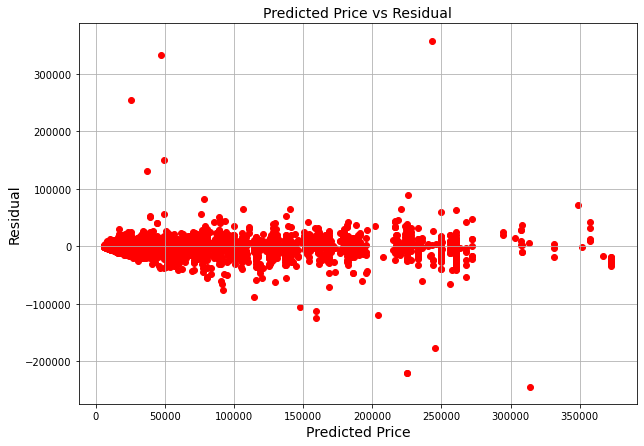

In [64]:
plt.figure(figsize=(10,7))
plt.scatter(data["pred"], data["residual"], color="red")
plt.title("Predicted Price vs Residual", fontsize=14)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [69]:
df.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor,Price
0,Huawei,Y5 Prime,16.0,2.0,Android,5.5,1,1,0,1,5000
1,Huawei,Y5,16.0,2.0,Android,5.7,1,1,0,1,5000
2,Apple,iPhone 4S,16.0,0.5,iOS,3.5,0,0,0,0,5000
3,Huawei,Y5,16.0,2.0,Android,5.7,0,0,0,0,5000
4,Huawei,Y5,16.0,2.0,Android,5.7,1,0,0,0,5000


In [ ]:
#X = pd.get_dummies(X, columns=["Brand", "Model", "OS"], drop_first=True)
#X.head()

In [75]:
new_data = [['Brand', "Apple"],['Model', "iPhone 11"],['ROM', 16.0],['RAM', 64],['OS',"iOS"],['Screen size',5.9],['Dual Sim', 0],['Expandable Memory',0],['5G',0],['Fingerprint Sensor',0]]
new_data2 = {'Brand': ["Apple"],
             'Model': ["iPhone 11"],
             'ROM':[16.0],
             'RAM':[64],
             'OS':["iOS"],
             'Screen size':[5.9],
             'Dual Sim':[0],
             'Expandable Memory':[0],
             '5G':[0],
             'Fingerprint Sensor':[0]
            }
dat2 = pd.DataFrame(new_data2)
dat = pd.DataFrame(new_data)
dat2.head()

,Brand,Model,ROM,RAM,OS,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor
0,Apple,iPhone 11,16.0,64,iOS,5.9,0,0,0,0


In [76]:
X2 = pd.get_dummies(dat2, columns=["Brand", "Model", "OS"], drop_first=True)
X2.head()

,ROM,RAM,Screen size,Dual Sim,Expandable Memory,5G,Fingerprint Sensor
0,16.0,64,5.9,0,0,0,0


In [77]:
pred_test2 = stacking_estimator.predict(new_data2)
print(pred_test2)

TypeError: float() argument must be a string or a number, not 'dict'